In [2]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

import pandas as pd
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 14

from matplotlib.ticker import ScalarFormatter, LogLocator


Text(0, 0.5, 'Runtime (sec)')

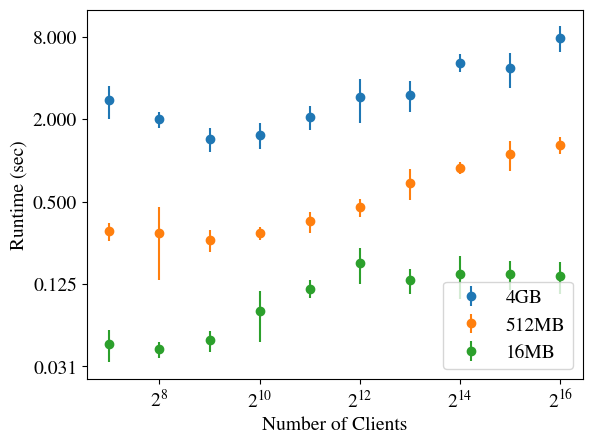

In [55]:
# GENERATING NAIVE DATA PLOT WITH 16 NODES, 32 TPN
output1 = "basic-chare-benchmarks/frontier/results/odfr16nodes512tasks4096MB.out"
output2 = "basic-chare-benchmarks/frontier/results/odfr16nodes512tasks512MB.out"
output3 = "basic-chare-benchmarks/frontier/results/odfr16nodes512tasks16MB.out"

fig, ax = plt.subplots()

for file in [output1, output2, output3]:
    dataframe = pd.read_csv(file, sep=' ', header=None)
    dataframe.columns = ['#PEs', 'Clients', 'Time']
    
    grouped = dataframe.groupby('Clients').agg(['mean', 'std'])
    ax.errorbar(grouped.index, grouped['Time']['mean'], yerr=grouped['Time']['std'], fmt='o')

# plot setup
ax.set_xscale('log', base=2)
ax.set_yscale('log')

ax.set_yticks(np.logspace(-8, 1, num = 5, base=2))
ax.get_yaxis().set_tick_params(which='minor', size=0)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.xlabel('Number of Clients')
plt.ylabel('Runtime (sec)')
plt.legend(['4GB', '512MB', '16MB'])

In [1]:
# PLOT 2 for the paper: FOR NAIVE VS CKIO

### plot basic summary data as BC vs average time (with error bars) ###
summary_file = 'basic-chare-benchmarks/bridges/results/16nodes_32tasks_4GB/summary.out'
ckio_file = '/jet/home/mtaylor5/ckio-testsuite/ckio-benchmarks/results/16nodes_32tasks_4GB/summary.out'


# read data in format (chares, 10 runs)
summary_data = pd.read_csv(summary_file, sep=' ', header=None)
summary_data.columns = ['#BC', 'run1', 'run2', 'run3', 'run4', 'run5', 'run6', 'run7', 'run8', 'run9', 'run10']
plt.errorbar(summary_data['#BC'], summary_data.iloc[:, 1:].mean(axis=1), yerr=summary_data.iloc[:, 1:].std(axis=1), fmt='o')

# read data in format (chares, 10 runs)
ckio_summary = pd.read_csv(ckio_file, sep=' ', header=None)
ckio_summary.columns = ['#PEs', '#BC', 'run1', 'run2', 'run3', 'run4', 'run5', 'run6', 'run7', 'run8', 'run9', 'run10']
plt.errorbar(ckio_summary['#PEs'], ckio_summary.iloc[:, 2:].mean(axis=1), yerr=ckio_summary.iloc[:, 2:].std(axis=1), fmt='o')

# plot setup
plt.xscale('log', basex=2)
plt.xlabel('Number of Clients')
plt.ylabel('Runtime (sec)')
#plt.title('4GB File Read, 16 Nodes (2^9 PEs) on Bridges2')
plt.legend(['Naive Input', 'CkIO with 2^9 Buffer Chares'])

NameError: name 'pd' is not defined

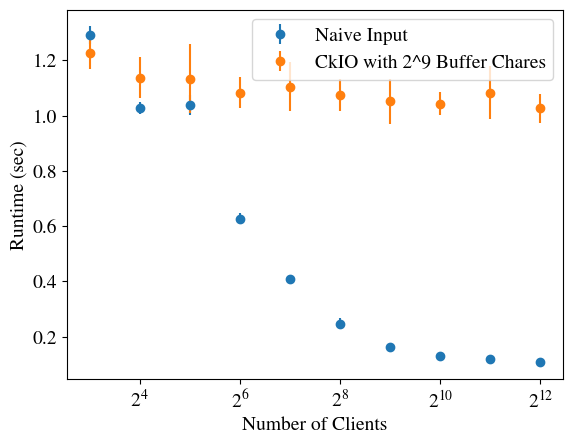

In [3]:
# PLOT 2 for the paper: FOR NAIVE VS CKIO on FRONTIER

### plot basic summary data as BC vs average time (with error bars) ###
summary_file = 'basic-chare-benchmarks/frontier/results/odfr16nodes512tasks4096MB.out'
ckio_file = 'ckio-benchmarks/frontier/results/vary-clients-16nodes512tasks2^6bc.out'

# read data in format (chares, 10 runs)
summary_data = pd.read_csv(summary_file, sep=' ', header=None)
summary_data.columns = ['PEs', 'clients', 'time']
grouped = summary_data.groupby('clients').agg(['mean', 'std'])
plt.errorbar(grouped.index, grouped['time']['mean'], yerr=grouped['time']['std'], fmt='o')

# read data in format (chares, 10 runs)
ckio_summary = pd.read_csv(ckio_file, sep=' ', header=None)
ckio_summary.columns = ['clients', 'bc', 'pes', 'size', 'bg', 'time']
grouped = ckio_summary.groupby('clients').agg(['mean', 'std'])
plt.errorbar(grouped.index, grouped['time']['mean'], yerr=grouped['time']['std'], fmt='o')

# plot setup
plt.xscale('log', base=2)
plt.xlabel('Number of Clients')
plt.ylabel('Runtime (sec)')
#plt.title('4GB File Read, 16 Nodes (2^9 PEs) on Bridges2')
plt.legend(['Naive Input', 'CkIO with 2^9 Buffer Chares'])

    clients    BC  PEs  filesize    bgtime  totaltime
0      2048  4096  512      4096  0.184633   0.373364
1      2048  4096  512      4096  0.161815   0.168241
2      2048  4096  512      4096  0.193137   0.198680
3      2048  4096  512      4096  0.174534   0.178976
4      2048  4096  512      4096  0.167305   0.172509
5      2048  4096  512      4096  0.189545   0.194487
6      2048  4096  512      4096  0.192068   0.197947
7      2048  4096  512      4096  0.166653   0.171182
8      2048  4096  512      4096  0.177473   0.182554
9      2048  4096  512      4096  0.160235   0.165010
10     2048  1024  512       512  0.074264   0.073623
11     2048  1024  512       512  0.070715   0.070625
12     2048  1024  512       512  0.063116   0.062754
13     2048  1024  512       512  0.074965   0.074405
14     2048  1024  512       512  0.071671   0.071597
15     2048  1024  512       512  0.075920   0.075674
16     2048  1024  512       512  0.076413   0.075992
17     2048  1024  512      

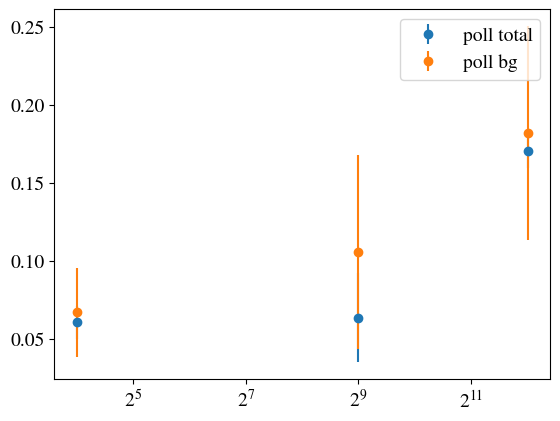

In [49]:
# PLOT 3: BACKGROUND WORK

### plot basic summary data as BC vs average time (with error bars) ###
summary1 = 'ckio-benchmarks/frontier/results/bgwork16nodes512tasks.out'
summary2 = 'ckio-benchmarks/frontier/results/bgwork16nodes512tasks_injection.out'

n=3
r = np.arange(n) 
width=.5
offset = 0
# read data in format (chares, 10 runs)
for summary_file in [summary1, summary2]:
    
    summary_data = pd.read_csv(summary_file, sep=' ', header=None)
    summary_data.columns = ['clients', 'BC', 'PEs', 'filesize', 'bgtime', 'totaltime']
    summary_data['bgtime'] = summary_data['bgtime'] / summary_data['PEs']
    
    print(summary_data)

    no_bg_work = summary_data.loc[summary_data['bgtime'] == 0]
    bg_work = summary_data.loc[summary_data['bgtime'] != 0]

    grouped_nobg = no_bg_work.groupby(['filesize']).agg(['mean', 'std'])
    plt.errorbar(grouped_nobg.index, grouped_nobg['totaltime']['mean'], yerr=grouped_nobg['totaltime']['std'], fmt='o')

    # grouped_bg = bg_work.groupby(['filesize']).agg(['mean', 'std'])
    # plt.errorbar(grouped_bg.index, grouped_bg['totaltime']['mean'], yerr=grouped_bg['totaltime']['std'], fmt='o')

    # print(grouped_bg)
    # x = ["16", "512", "4096"]
    # y1 = grouped_bg['bgtime']['mean'].to_numpy()
    # y2 = ( grouped_bg['totaltime']['mean'] ).to_numpy()
    
    # # plot bars in stack manner
    # plt.bar(r + offset, y1, width=width, color='r')
    # plt.bar(r + offset, y2, width=width, bottom=y1, color='b')
    
    # offset = .5
plt.xscale('log', base=2)
plt.legend(['poll total', 
           'poll bg', 
           'nopoll total',
           'nopoll bg'])